<img src=../figures/Brown_logo.svg width=50%>

# Data-Driven Design & Analyses of Structures & Materials (3dasm)

## Lecture 1a: Brief introduction to optimization

### Suryanarayanan M. S. | <a href = "mailto: s.manojsanu@tudelft.nl">s.manojsanu@tudelft.nl</a>  | PhD Candidate

# Outline for today's lecture
* Introduction to optimization
* Gradient descent and it's variations
* Finding gradients

**References:**
* J. R. R. Martins & Andrew Ning, Engineering Design Optimization, 2021 - Chapters 1 & 4
![GOO](./grr.png)

In [1]:
# Basic plotting tools needed in Python.
import matplotlib.pyplot as plt # import plotting tools to create figures
import numpy as np # import numpy to handle a lot of things!

%config InlineBackend.figure_format = "retina" # render higher resolution images in the notebook
plt.rcParams["figure.figsize"] = (8,4) # rescale figure size appropriately for slides

Matplotlib is building the font cache; this may take a moment.


# Why optimization matters?

*Machine Learning:*
1. **Parameter estimation**
    * Optimization is the tool to achieve our true goal: "generalization". 
    
    *  $\theta^* \in \text{arg}\,\min\limits_{\theta}\, \mathcal{L}(\mathbf{\theta})$, where $\mathcal{L}$ is the loss function and $\theta$ are the model parameters.
    

2. **Hyper-parameter tuning**


*Data-driven process:*

<img src=./data/blocks.png width=100%>

# Setting up an optimization problem

**General formulation**

<img src=./data/general_form.png width=50%>

* $\vec{x}$ are decision variables.
    * $\underline{x}$ and $\overline{x}$ are the lower and upper bounds.
* $f(\vec{x})$ is the objective function.
* $g$ and $h$ are constraint functions.

Note:
1. The lecture assumes this formulation
2. Different textbooks might follow anotherconvexntion
    * Optimization packages (and sometimes functions within a package) might follow different formulaions
    * Always check whether the constraints are defined as given above (LHS form)

E.g.
* (Scipy)[https://docs.scipy.org/doc/scipy/tutorial/optimize.html#constrained-minimization-of-multivariate-scalar-functions-minimize] has two algorithms `SLSQP` and `trust-constr`. One uses a combined LHS and RHS form while the latter uses RHS form.

### A. Decision variables or Design variables

<img style="float: right;" src="./data/dvs.png" width=30%>

* Represent the space of possibilities (aka Design space)
    * To be searched for the best solution
    
* Continuous or discrete

* Bounded or unbounded

* No: of design variables is the dimension of the problem

* Physically meaningful or abstract
    * E.g. thickness of a beam or a neural network's weight parameter

### B. Objective function

<img style="float: right;" src="./data/objective.png" width=30%>

* Performance metric to be optimized
* Single or multiple objectives are possible
* Can be linear or non-linear (in the design variables)
* E.g. weight of a beam or accuracy of a neural network

**Note**
- Optimization is often shown as a minimization problem. Maximization problems can be converted to minimization problems by multiplying the objective function by -1.

### C. Constraints

<img style="float: right;" src="./data/constraint.png" width=30%>

* Functions that limit the design space.
    * Makes life (and optimization) much more difficult.
        * Solution has to be **feasible** (not violate any constraints)
        * Solution has to be **optimal** (best possible solution)
        * Induces new solutions! (See ⭐)
    * Needs specialized algorithms to solve such problems.
* Linear or Non-linear
* Equality or inequality
    * Inequality is more difficult to handle!
* Bounds on the design variables are called **box constraints**.
    * However, they are much easier to handle.
* E.g. Stress in a beam should <= yield stress of the material.

### Narrowing our focus

- Optimization is extremely vast
- Let's simplify things for ML
    - Discrete or continuous decision variables
    - Single objective
    - No constraints -> Unconstrained

<img align=center src="./data/narrow_focus.png" width=50%>


# Characteristics of an optimization problem

* Attributes of the problem 
    * Helps classify the problem
    * May help in getting better solutions with less resources!
* Some important attributes are:
    * Smoothness of the functions involved
    * Linearity
    * Stochasticity
    * **Modality**
    * **Convexity**

### Modality

<img align=right src="./data/modality.png" width=30%>

* Modes = Minima
    * Minima are points that are better than their neighbours
    * $x^*$ is a minima if $f(x^*) \leq f(x)$ for every $x \in \{||x - x^*|| < \epsilon\ , \epsilon > 0 \}$
    * Global minima vs local minima
* Multi-modal functions cause problems (like multi-modal distributions)
    * Getting stuck in local minima
    * Every global minimum is also a local minimum


**How do we know we have found the best solution possible ?**
* In general, we don't!

### Convexity

* Purely mathematical
* **Golden rule: If an optimization problem is convex, all local minima are global minima**


* What is a convex optimization problem ?
    * If all functions involved are convex
    * ...

* Convex functions should meet 2 criteria

**A** : *The line segment joining any two points of the graph of the function has to be above the function itself.*
* For any two points $\vec{x}, \vec{y}$ in the domain of $f$ and variable $0 \leq \alpha \leq 1$ :
    
$$f(\alpha \vec{x} + (1 - \alpha) \vec{y}) \leq \alpha f(\vec{x}) + (1 - \alpha) f(\vec{y})$$

**B** : *The domain of the function should not have holes*
* The line segment joining two points of a set should also lie in the set
* For continuous design variables in unconstrained settings, this is always valid

<img align=centre src="./data/convexity.png" width=80%>

# Solving optimization problems

* Search algorithms = optimizers
* Choice of optimizer is dependent on problem characteristics

## Classification

<img align=centre src="./data/optimizers.png" width=80%>

1. **Search strategy**
    * Local: Search in the viscinity of their initialization
        * Exploitative nature
        * Finds the nearest minima
        
    * Global: Search the entire design space (or try)
        * Exploratory in nature

2. **Algorithm design**
    * Heuristics
        * Nature inspired or based on rules-of-thumb
        * Robust (fewer assumptions) & general
    * Mathematically designed
        * Strictly converge to an optimal point*.
        * Works well when the assumptions match the problem
        * Very efficient
        * Difficult to design and implement

3. **Order of information used**

* Practically, the most important classification
* Lets dive a bit deeper!

## Taylor series and order of information


* Approximating a function $f$ at a given point $x_0$
    
$$f(x + \alpha)|_{x=x_0} \approx f(x_0) + \frac{df}{dx}\Big\lvert_{x=x0} \alpha + \frac{1}{2}\frac{d^2 f}{d x^2}\Big\lvert_{x=x_0}\alpha^2 + \mathcal{O}(\alpha^3)$$ 
 
 

        

* $\alpha$ is the perturbation
    * Since there is one direction, the perturbation is along $\hat{x}$
* More terms implies a better approximation
    * The error in the approximation scales as $\alpha^{n+1}$, if we include only n terms
        


**In n-dimensions**


$$ f(\vec{x} + \alpha \vec{p})|_{x=\vec{x}_0} \approx f(\vec{x}_0) + \alpha \nabla f(\vec{x}_0)^T \vec{p} + \frac{1} {2}\alpha^2 \vec{p}^T   \mathbf{H}(\vec{x}_0)   \vec{p}$$

* The main difference is that we perturb along a given direction!
* This is the form used for many optimization algorithms 

* Three terms in the series
    * The value of the function at the x (our point of interest) - **Zeroth term**
    * The gradient - vector of partial derivatives - **First order term**
        - Generalization of the first-derivative to n dimensions
        - Magnitude
         $$ ||\nabla f(\vec{x})|| = \Big[\frac{\partial f}{ \partial x_1}, \frac{\partial f}{ \partial x_2} ..., \frac{\partial f}{ \partial x_n} \Big]$$
        - Direction - steepest ascent of the function. i.e. the direction in which the function increases the fastest.
    * Hessian -  matrix of second-order derivatives - **Second order term**
        - Generalization of the second-derivative to n dimensions - A symmetric matrix with size n x n
    $$ H(\vec{x}) = \begin{bmatrix} \frac{\partial^2 f}{\partial x_1^2} & \cdots & \frac{\partial^2 f}{\partial x_1 \partial x_n} \\ \vdots &  \ddots & \vdots \\ \frac{\partial^2 f}{\partial x_n \partial x_1} & \cdots & \frac{\partial^2 f}{\partial x_n^2} \end{bmatrix} $$

        - This matrix represents the curvature of the function (since it is a change in the gradients!).

### How to know a minima if we see one

* If we have the gradient and the Hessian, we have conditions to identify minima!
    * Since we can "look" around a point!
    * Mathematically these conditions are known as the **optimality criteria**
* These conditions are used by mathematical gradient-based optimizers to find the optimum point.
    * In constrained optimization, optimality is checked with KKT (Karush-kuhn tucker) conditions and are quite           complicated.

**First condition** 
* At a local minimum, gradient should vanish.
    * Slope of the function in every direction is zero
* If the gradient is non-zero, we can travel opposite to the gradient to reduce the function further.
* Other points where gradient can be zero
    * local maxima
    * saddle points!
* So how do we check ?
    * Use more information!

**Second condition**
* Based on the nature of the Hessian

<img align=centre src="./data/hessian_stationary_points.png" width=80%>

## Different types of optimizers

* We need optimizers to solve optimization problems
* Optimizers need information about the function
* With gradients and Hessians, we can identify minima

In [23]:
class FunctionPlot():
    """Simple class to manage plotting of a function.

    Plot the function, its first order model and its second order model.
    All of these can be plotted one by one.
    """
    def __init__(self, bounds=50):
        self.count = 0
        self.saved_x = []  # Saved every input received
        self.line = None
        self.bounds = bounds  # Bounds on the decision variable
        self.random_coeff = np.random.choice(np.arange(-20, 20, 5))  # For the underlying function
        self.show_canvas()

    def underlying_func(self, x):
        """A quadratic function with a random coefficient."""
        return x**2 - self.random_coeff*x + 1

    def gradient(self, x):
        """The gradient of the underlying function."""
        return 2*x - self.random_coeff

    def hessian(self, x):
        return 2

    def first_order_model(self, x, x0):
        """The first order model of the underlying function."""
        return self.underlying_func(x0) + self.gradient(x0)*(x - x0)

    def second_order_model(self, x, x0):
        """The second order model of the underlying function."""
        return self.underlying_func(x0) + self.gradient(x0)*(x - x0) + 0.5*self.hessian(x0)*(x - x0)**2

    def show_canvas(self):
        """Sets up the figure on which to plot."""
        fig, ax = plt.subplots(1, 1, figsize=(10, 5))
        ax.set_xlabel('x')
        ax.set_ylabel('y = f(x)')
        ax.set_xlim(-self.bounds, self.bounds)
        ax.axvline(x=-self.bounds+3, color='r')  # To show the limit
        ax.axvline(x=self.bounds-3, color='r')
        self.fig = fig
        self.ax = ax

    def plot(self, x_value, with_first_order=False, with_second_order=False):
        """Plots the function, its first order model or its second order model."""
        self.count += 1
        self.saved_x.append(x_value)

        self.ax.plot(self.saved_x,
                         [self.underlying_func(x) for x in self.saved_x], 'bo')

        if with_first_order:
            self._plot_first_order_model()
        elif with_second_order:
            self._plot_second_order_model()
        else:
            pass
        plt.show()

    def _plot_first_order_model(self):
        if self.line is not None:
            self.line.pop(0).remove()
        x = np.linspace(-self.bounds, self.bounds, 100)
        y = self.first_order_model(x, self.saved_x[-1])
        self.line = self.ax.plot(x, y, 'b--')

    def _plot_second_order_model(self):
        if self.line is not None:
            self.line.pop(0).remove()
        x = np.linspace(-self.bounds, self.bounds, 100)
        y = self.second_order_model(x, self.saved_x[-1])
        self.line = self.ax.plot(x, y, 'b--')

    def plot_minimum(self):
        """Shows the minimum of the function."""
        min_x = self.random_coeff / 2
        min_y = self.underlying_func(min_x)
        self.ax.plot(min_x, min_y, 'x', markersize=20, color='r')
    
    def plot_func(self):
        x = np.linspace(-self.bounds, self.bounds, 100)
        y = self.underlying_func(x)
        self.ax.plot(x, y, "b:")
        

### Simple exercise
* In the shoes of an optimizer
    * Three cases - Zeroth, First and Second order optimizers
    * Walk and see the objective as the optimizers do!

#### Case 1: Zeroth-order optimizers
* Also called Black-box / derivative-free optimizers
    * No information about the function other than its value at a point.
* Used when the decision variables are discrete.
    * Gradient and the hessian are not defined
* They are used in hyper-parameter optimization for ML models since the decision variables are discrete and the function is a black box.

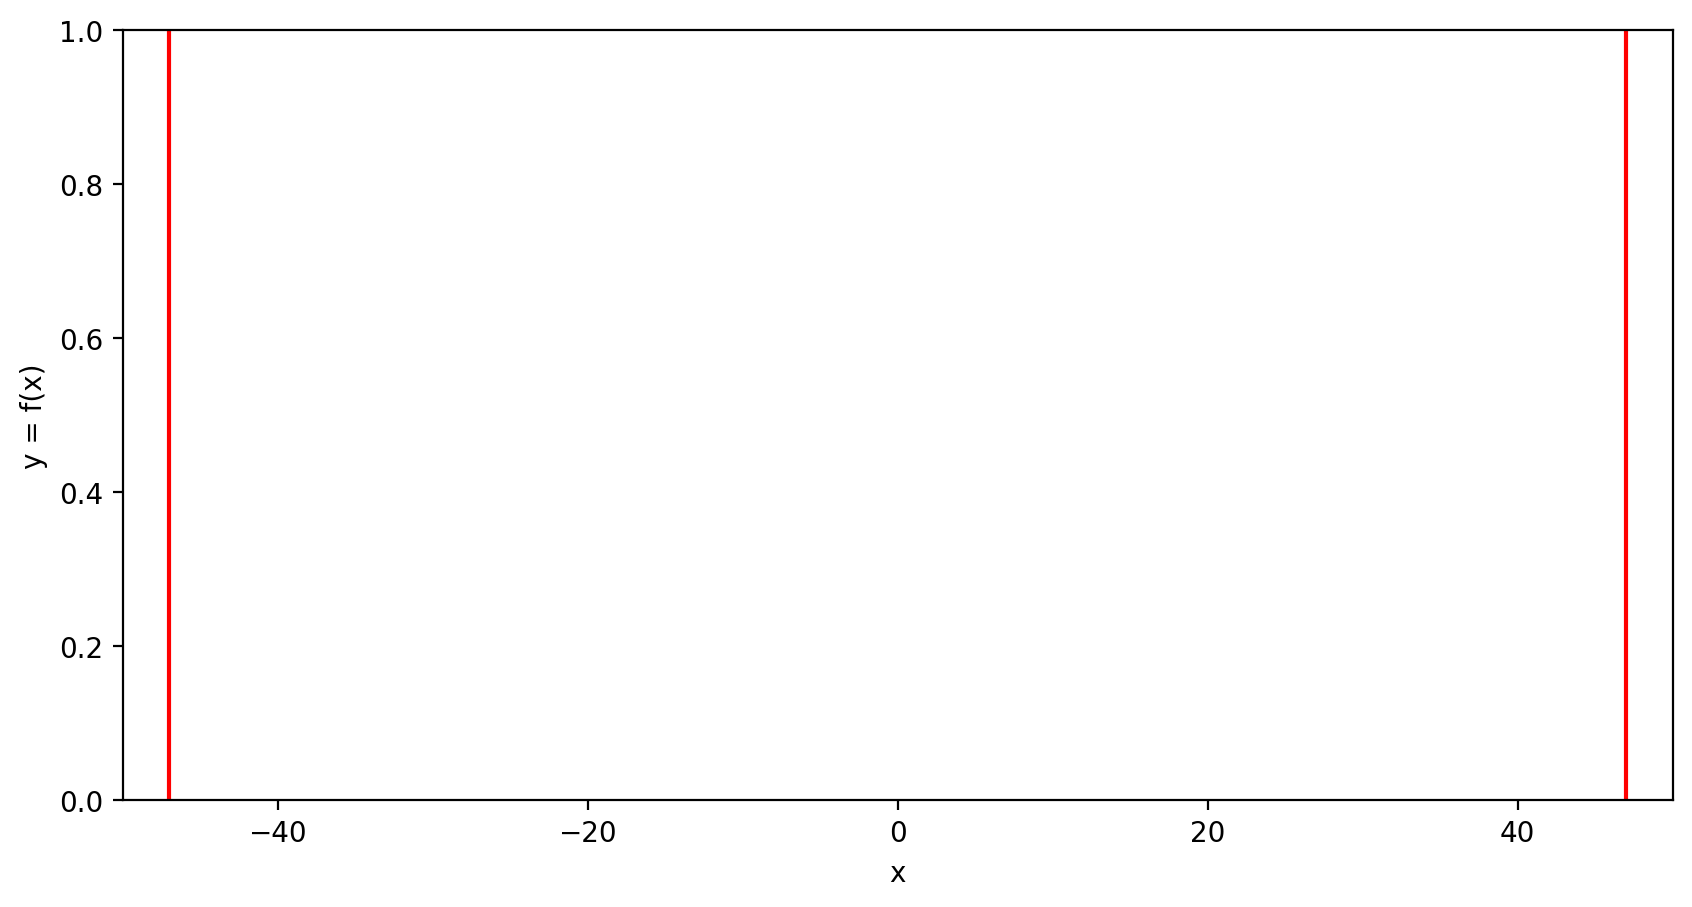

In [24]:
# Create the object separately in a cell
plotter = FunctionPlot()

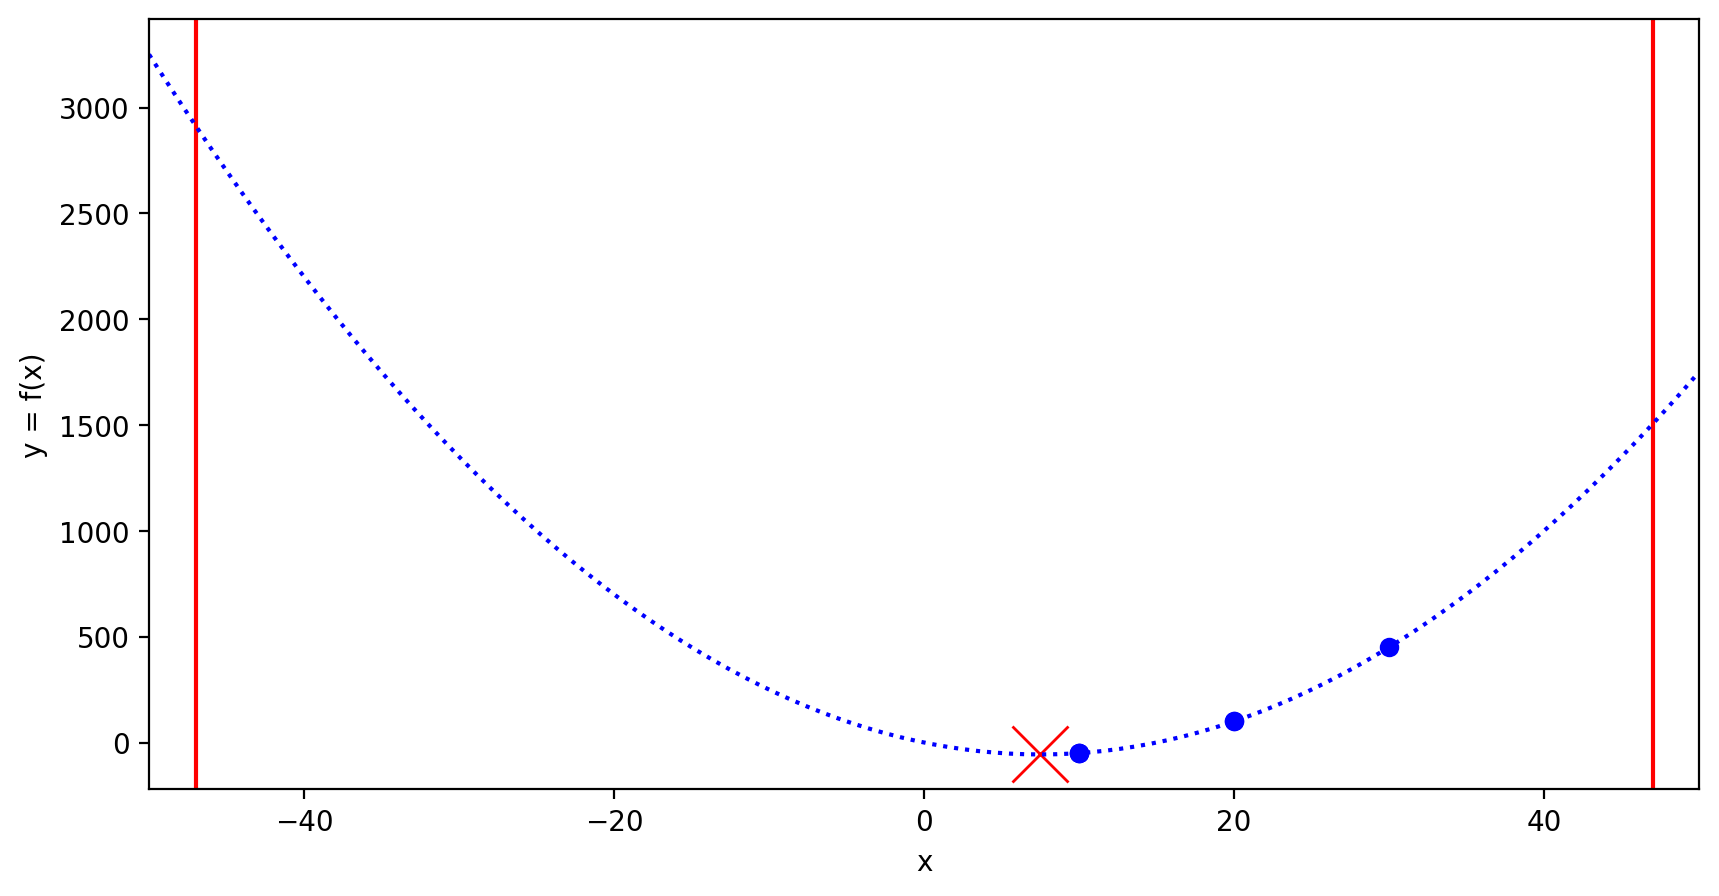

In [25]:
x = 10
plotter.plot(x)
x = 20
plotter.plot(x)
x = 30
plotter.plot(x)
plotter.plot_minimum()
plotter.plot_func()
plotter.fig

**Issues with Zeroth-order methods**
* Not very efficient.
    * The number of function evaluations increases exponentially with dimensionality.
    * This is called the `curse of dimensionality`.

#### Case 2: First-order methods

* Utilize gradients
* Main workhorse of modern ML    
    * Powered by backpropagation (Next lecture!)
    * Need an initial guess
    * Has an update rule to change the guess until convergence
   
   
* General update rule 
$$\vec{x}_{k+1} = \vec{x}_k + \eta \times \vec{p}$$
    * $\vec{p}$ is a **search direction** (where to move)
    * $\eta$ is a **step size** (How much to move along $\vec{p}$)

**Gradient descent**
* Moving against the gradient ensures that we are decreasing the function's value most rapidly.
    * The simplest case is gradient descent (GD)
        * $\vec{p} = -\nabla f$

Notes:
* A version of this called `SGD` (Stochashastic GD) is still a major ML optimizer
    * In SGD, the gradient used is an estimate of the true gradient
    * $\vec{p} = -\nabla \tilde{f}$

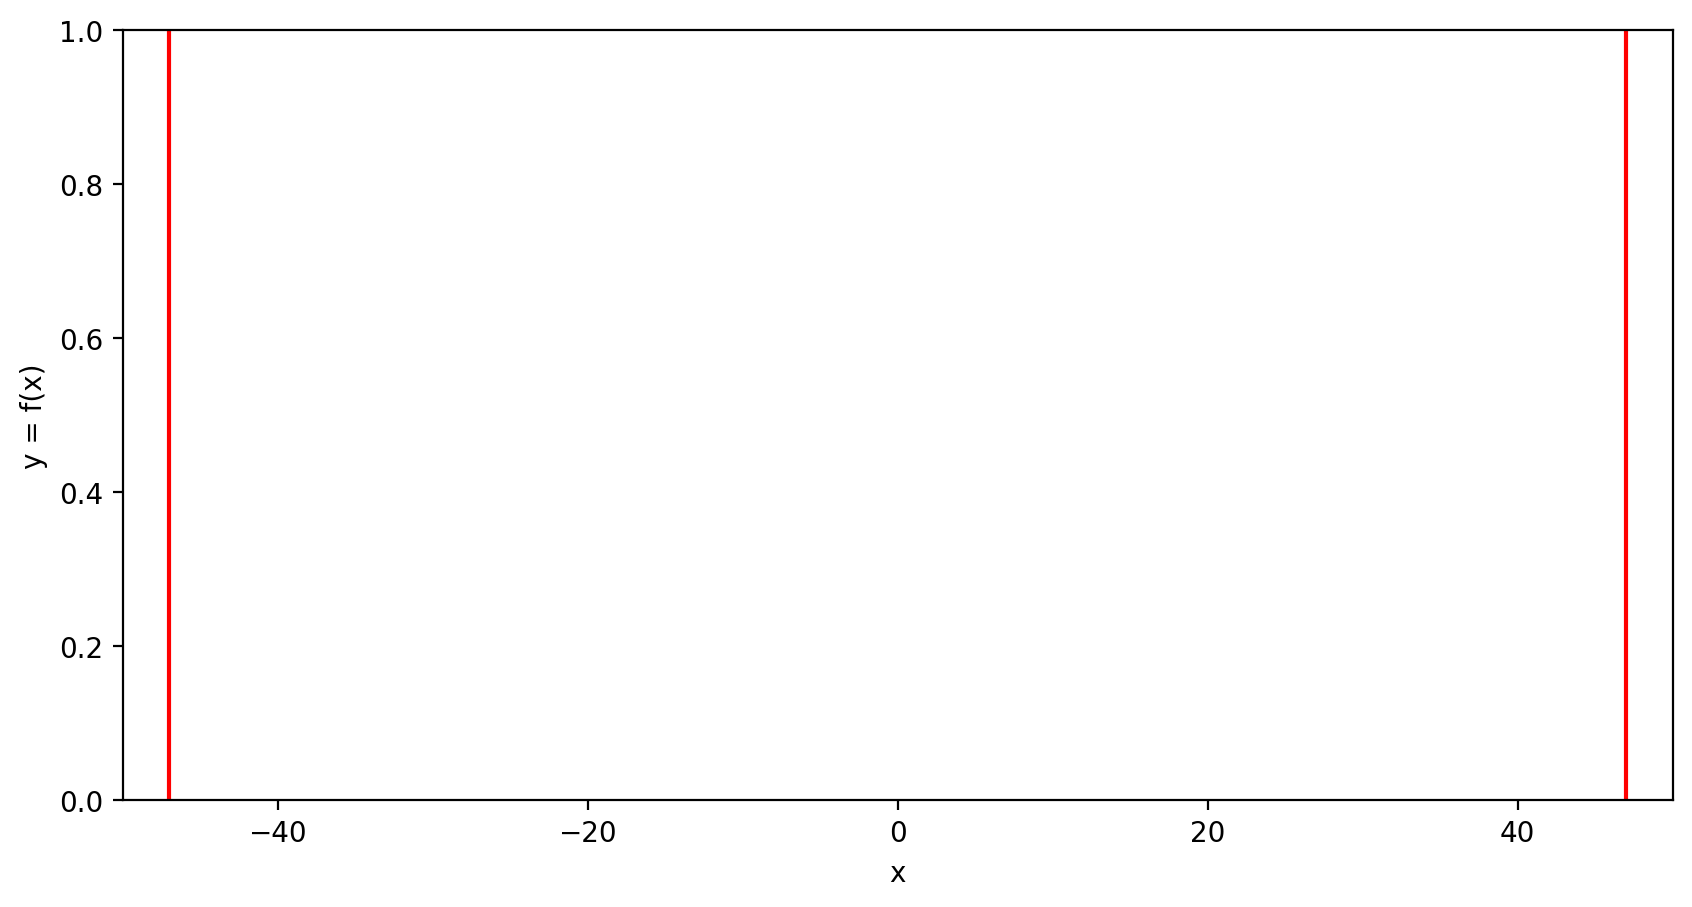

In [26]:
plotter = FunctionPlot()

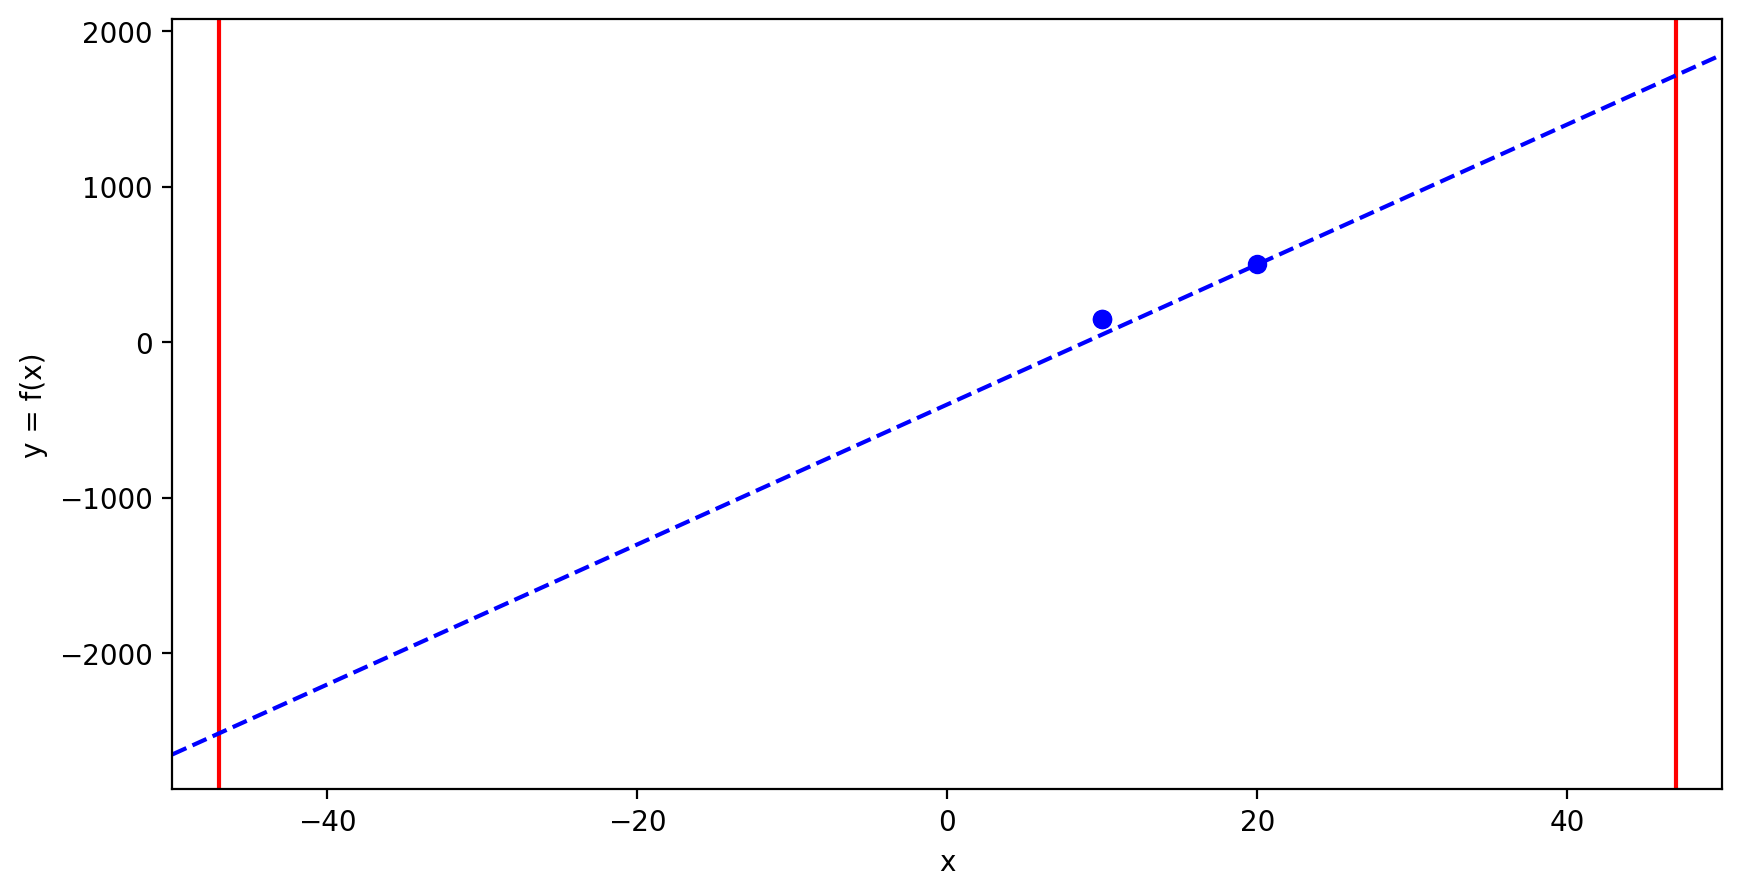

In [27]:
x = 10
plotter.plot(x, with_first_order=True)
x = 20
plotter.plot(x, with_first_order=True)
plotter.fig

* The step size ($\eta$) is a hyper-parameter that needs to be chosen.
    * If it is too small, the convergence will be slow.
    * If it is too large, the algorithm will oscillate and may not converge at all.
    * Many strategies to choose the step size.
        * The simplest is to use a fixed step size.
        * Use a step-size schedule where the step size is reduced as the algorithm progresses.
        * Another strategy is to use a `line-search algorithm` to find the best step size at each iteration.
            * Robust yet expensive
            * Not useful if gradients have errors!
                * Usual case in ML (gradients are estimated!)

Notes:

* Pure gradient descent is not used in practice since it can oscillate when the curvatures along different directions are widely different.
    * E.g. Imagine a 2D optimization where the decision variables are the length and thickness of a tube for a shell and tube heat exchanger
        * The length can be in "metres" while the thickness would be in "millimetres"
        * The three orders of magnitude difference will be reflected in the gradient components as well
        
<img align=centre src="./data/gradient_descent_issue.png" width=80%>

Momentum is a technique that is used to speed up convergence and reduce oscillations. It is based on the idea that the gradient at the current point is a good estimate of the gradient at the next point. So, we can use the gradient at the current point to update the next point. This is done by introducing a momentum term `m` which is a fraction of the previous gradient. The update rule becomes:
$$ x_{k+1} = x_k - \alpha m \nabla f(x_k)$$

#### Case 3: Second-order methods

* Most powerful methods in optimization
* Uses both Gradient and Hessian
* The update rule for these methods is still:
$$\vec{x}_{k+1} = \vec{x}_k + \eta \vec{p}$$
* But $\vec{p} = - \mathbf{H}^{-1} \nabla f$
    * This can be thought of as scaling the gradients according to the curvatures

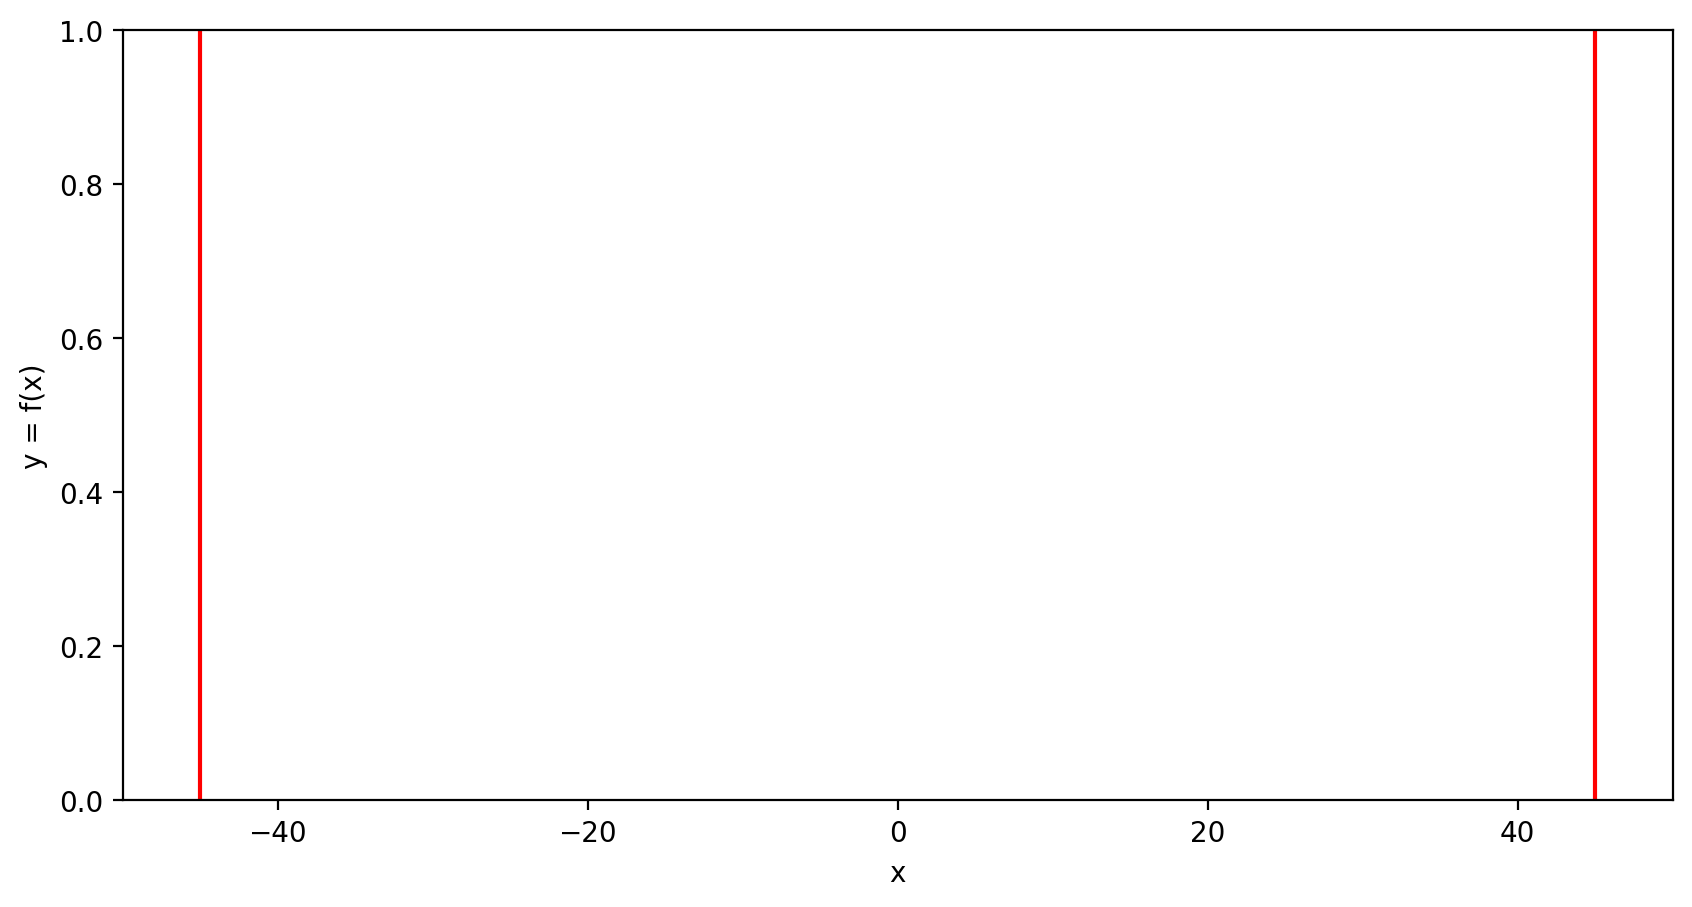

In [10]:
plotter = FunctionPlot()

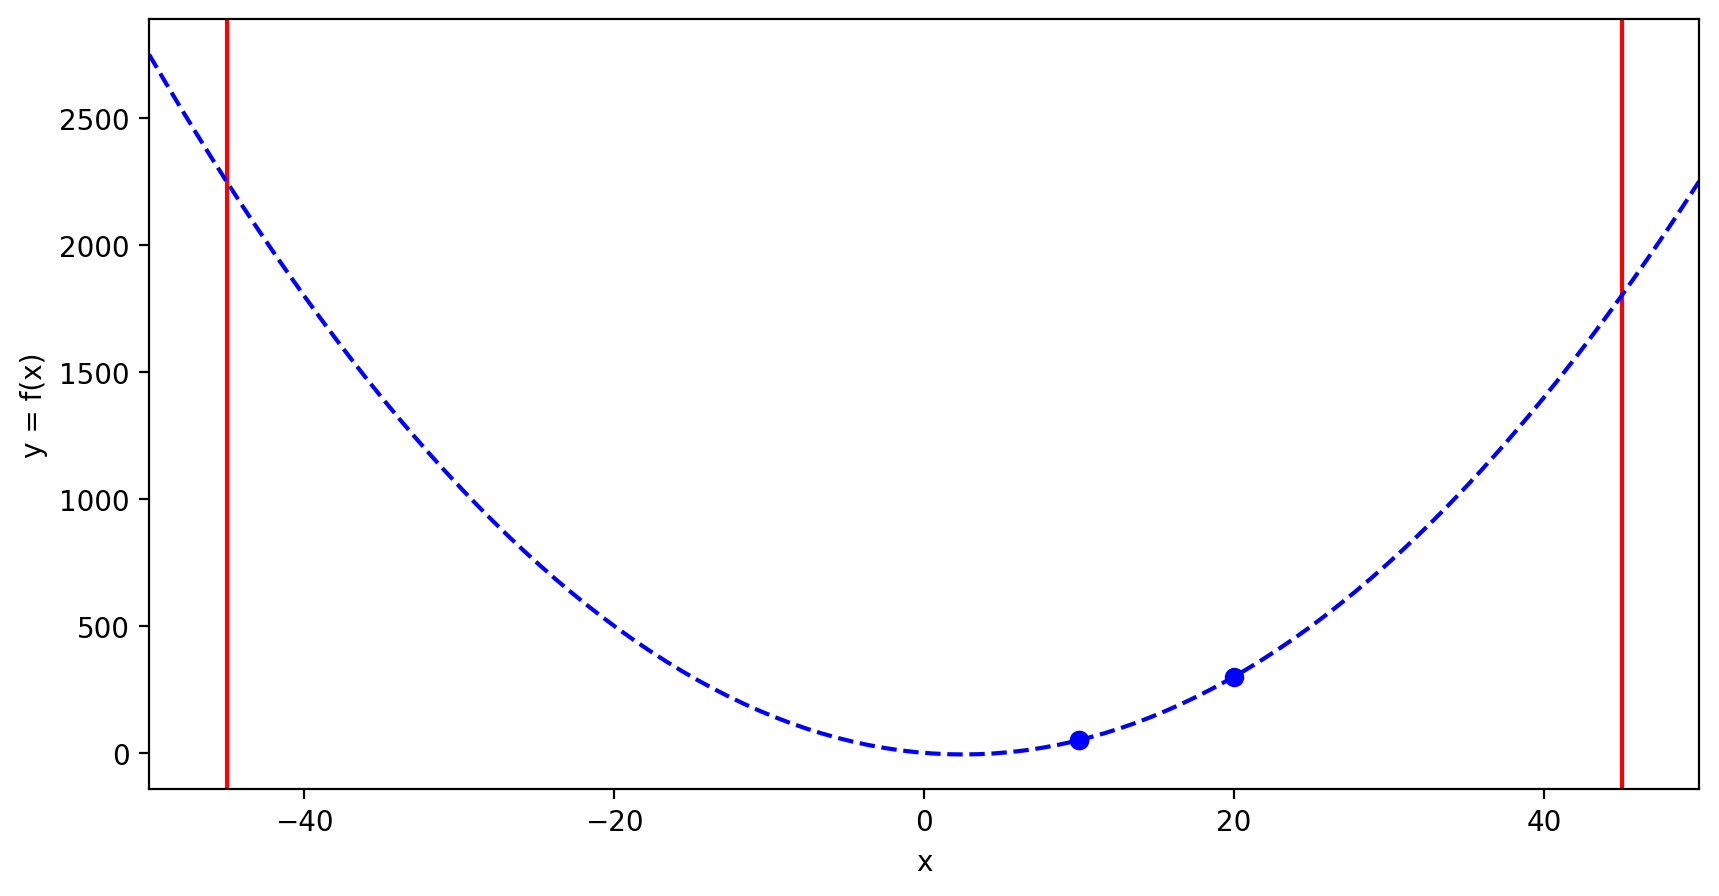

In [11]:
x = 10
plotter.plot(x, with_second_order=True)
x = 20
plotter.plot(x, with_second_order=True)
plotter.fig

* For quadratic functions, this method converges in a single step!
    * Fastest optimizers
    * When using exact Hessian, it is also called Newton's method
* However,
    * If the Hessian is not positive definite, this method will not converge
    * Very expensive to calculate Hessian
    * Impossible to store - Dense matrix (for large neural networks!)
* Quasi-Newton methods
    * Lower costs than Newton's method
    * Faster than First-order methods
    * Estimate the Hessian from multiple previous gradients
    * $\vec{p}= - \mathbf{B} \nabla f$
        * $\mathbf{B}$ is a positive definite approximation of $\mathbf{H}^{-1}$

## Concluding remarks (5 min)
- Summary of the lecture
- Gradients are important 
- Next lecture, how are gradients calculated in ML [Autodiff]